# Algorithms

## Corner Detection Algorithms

* Harris Corner Detector
* Shi Tomasi Corner Detector

## Feature Detection Algorithms

* Scale Ivariant Feature Trasnform (SIFT)
* Speeded Up Robust Features (SURF)
* Oriented FAST and Rotated BRIEF (ORB)

### Harris Corner Detector

Haris köşe tespiti, bir kaydırıcı kutuyu görüntü üzerinde kaydırarak köşeleri bulan ve bir eşik uygulayan bir yöntemdir; ardından köşeler görüntüde işaretlenir. Bu algoritma, genellikle görüntünün köşelerini tespit etmek için kullanılır. Bu algoritma, görüntü işleme ve bilgisayar görüşü uygulamalarında yaygın olarak kullanılır. Özellikle nesne takibi, görüntü hizalama ve stereo görüntü eşleme gibi alanlarda kullanılırlar.

In [33]:
import cv2
import cv2 as cv
import numpy as np

In [34]:
img1 = cv.imread("CyberTruck.png")
cv.imshow("CyberTruck", img1)
cv.waitKey(0)

-1

In [35]:
gray_img = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray_img1 = np.float32(gray_img)

In [36]:
dst = cv.cornerHarris(gray_img1, blockSize=8, ksize=3, k=0.04)

img : Input image, it should be grayscale and float32 type.
blockSize : It is the size of neighbourhood considered for corner detection,
ksize : Aperture parameter of Sobel derivative used.
k : Harris detector free parameter in the equation.

In [37]:
dst = cv.dilate(dst, None)

In [38]:
img1[dst>0.01*dst.max()]=[255,0,255]
cv.imshow(f"CyberTruck ", img1)
cv.waitKey(0)

-1

Threshold değerimizi küçülttüğümüzde, tespit edilen köşe sayısı artar.

### Shi Tomasi Corner Detector

Shi ve Tomasi, Haris köşe tespiti algoritmasıyla büyük ölçüde benzer olan farklı bir köşe tespiti algoritması geliştirdi. Tek fark, görüntünün yalnızca en güçlü n köşesini bulabileceğimiz çekirdek değerinde olacaktır. Bu, yalnızca sınırlı ve çok önemli görüntü özelliklerine ihtiyaç duyduğumuzda büyük ölçüde yardımcı olabilir.

In [39]:
img2 = cv.imread("CyberTruck.png")

In [40]:
gray_img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

In [41]:
corners = cv.goodFeaturesToTrack(gray_img2, maxCorners=100, qualityLevel=0.01, minDistance=1)

corners = np.int0(corners)

for i in corners:
    x,y = i[0]
    x=int(x)
    y=int(y)
    cv.circle(img2, (x,y), 3, 255, -1)

cv.imshow("CyberTruck with Shi-Tomasi", img2)
cv.waitKey(0)

C:\Users\erim\AppData\Local\Temp\ipykernel_31832\3673471903.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


-1

image : Input 8-bit or floating-point 32-bit, single-channel image.
maxCorners : Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
qualityLevel : Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue or the Harris function response.
minDistance : Minimum possible Euclidean distance between the returned corners.

In [46]:
img3 = cv.imread("eagle.png")
img3_1 = cv.imread("eagle.png")

In [47]:
gray_img3 = cv.cvtColor(img3_1, cv.COLOR_BGR2GRAY)
gray_img3_1 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

In [49]:
dst_gray_img3 = cv.cornerHarris(gray_img3_1, blockSize=8, ksize=3, k=0.04)

corners_gray_img3 = cv.goodFeaturesToTrack(gray_img3, maxCorners=100, qualityLevel=0.01, minDistance=1)

for i in corners_gray_img3:
    x,y = i[0]
    x=int(x)
    y=int(y)
    cv.circle(img3, (x,y), 3, 255, -1)

img3_1[dst_gray_img3>0.01*dst_gray_img3.max()]=[255,0,255]
cv.imshow("eagle with Harris", img3_1)
cv.imshow("eagle with Shi-Tomasi", img3)
cv.waitKey(0)

-1

## Feature Detection Algorithms

### Scale Invariant Feature Transform (SIFT)

Haris ve Shi-Tomasi, görüntünün köşelerini tespit etmek için kullanılan algoritmalar olsa da, SIFT, görüntünün ölçek ve rotasyonu ile bağlantısız olarak nesneleri tespit eden önemli bir algoritmadır. Bu, gerçek dünya nesnelerini bir görüntü ile karşılaştırırken çok yardımcı olur; çünkü görüntünün açısı ve ölçeğinden bağımsızdır. Bu yöntem, görüntülerin işaretlenmesi gereken anahtar noktalarını döndürecektir.

In [50]:
img4 = cv.imread("CyberTruck.png")

gray_img4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp = sift.detect(gray_img4, None)

img4 = cv.drawKeypoints(gray_img4, kp, img4, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow("CyberTruck with SIFT", img4)
cv.waitKey(0)

-1

### Speeded Up Robust Feature (SURF)

SIFT algoritması çoğu durumda iyi performans gösterse de önemli bir kısıtlaması bulunmaktadır. Algoritmasal uygulaması çok yavaştır. Bu sorunu aşmak için "Speeded Up Robust Features (SURF)" adı verilen yeni bir yöntem geliştirilmiştir. SIFT algoritmasına benzer, ancak çok daha hızlıdır. SURF'un yaklaşımı, kutu filtreleri kullanarak operatörlerin hızlı hesaplanmasına dayanmaktadır.

In [30]:
img5 = cv2.imread('CyberTruck.png.jpg')
img_gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create()

keypoints = surf.detect(img_gray5, None)
cv2_imshow(cv2.drawKeypoints(img5, keypoints, None, (255, 0, 255)))

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


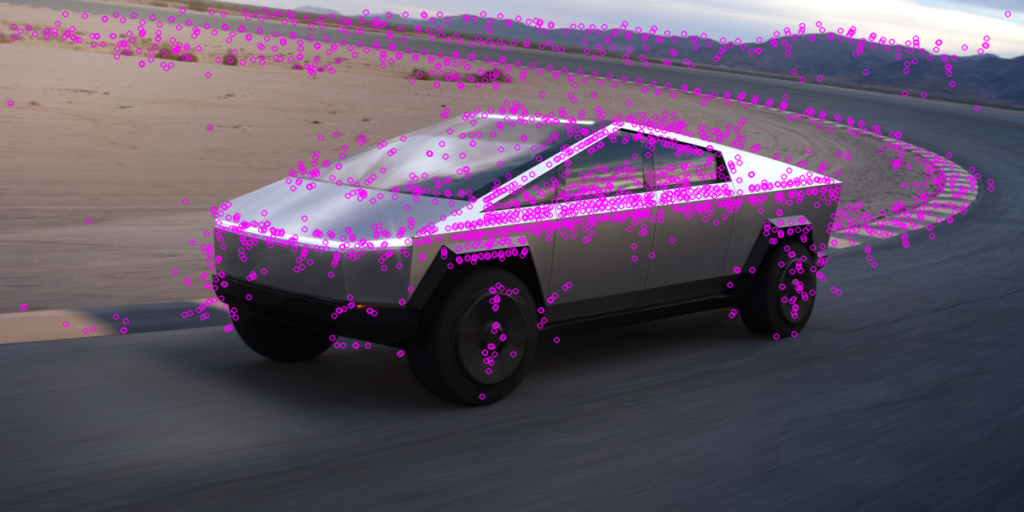

### Oriented FAST and Rotated BRIEF (ORB)

ORB, SIFT ve SURF ile karşılaştırıldığında görüntünün özelliklerini tespit etmek için oldukça etkili bir yoludur. ORB, önemli özellikleri daha kısa sürede tespit ettiği için SIFT ve SURF algoritmalarına kıyasla daha az sayıda özellik bulmaya programlanmıştır. Yine de bu algoritma, diğer tespit algoritmalarıyla karşılaştırıldığında oldukça etkili bir algoritma olarak kabul edilir.

In [51]:
img6 = cv.imread("CyberTruck.png")

orb =cv.ORB_create(nfeatures=1000)

keypoints, descriptors = orb.detectAndCompute(img6, None)

cv.imshow("CyberTruck with ORB", cv.drawKeypoints(img6, keypoints, None,(255,0,255)))
cv.waitKey(0)

-1

In [32]:
n_features = [100,500, 1000]
img6_1 = cv.imread("CyberTruck.png")

for i in n_features:
    orb =cv.ORB_create(nfeatures=i)

    keypoints, descriptors = orb.detectAndCompute(img6_1, None)

    cv.imshow(f"CyberTruck with ORB {i}", cv.drawKeypoints(img6_1, keypoints, None,(255,0,255)))
    cv.waitKey(0)   

"nfeatures = 100" olarak ayarlandığında, tespit edilen köşe sayısının çok az olduğunu gözlemleyebiliriz. Ne zaman ki özellik sayısını artırırsak, tespit edilen köşe sayısı da artar.

# Conclusion

Harris Corner Detector ve Shi-Tomasi Corner Detector: Harris ve Shi-Tomasi köşe tespit algoritmaları, görüntü işleme ve bilgisayar görüşü uygulamalarında yaygın olarak kullanılır. Bu algoritmalar, görüntülerdeki önemli özelliklerin tespit edilmesine yardımcı olur. Özellikle nesne takibi, görüntü hizalama ve stereo görüntü eşleme gibi alanlarda kullanılırlar.

Scale Invariant Feature Transform (SIFT): SIFT, özellik tanıma ve nesne tanıma uygulamalarında kullanılır. Bu algoritma, görüntüler arasında benzersiz özelliklerin tespiti ve bu özelliklerin ölçek, dönüş ve konum değişikliklerine karşı invariant olmasını sağlar. Bu nedenle nesne tanıma ve eşleme, yüz tanıma ve benzeri görevlerde yaygın olarak kullanılır.

Speeded Up Robust Features (SURF): SURF, hızlı ve sağlam özellik tespiti gerektiren uygulamalarda tercih edilen bir algoritmadır. Özellikle nesne izleme, hızlı nesne tespiti ve benzeri görevlerde kullanılır. SIFT'e benzer şekilde özellikleri tespit eder, ancak hesaplamaları daha hızlı yapar.

Oriented FAST and Rotated BRIEF (ORB): ORB, gerçek zamanlı uygulamalarda yaygın olarak kullanılan bir özellik tespit ve tanıma algoritmasıdır. Özellikle nesne takibi ve hareketli nesnelerin izlenmesi gibi görevlerde kullanılır. ORB, hızlı ve sağlamdır ve genellikle yerel özelliklerin tanımlanması için kullanılır.

Bu algoritmalar, farklı görüntü işleme ve bilgisayar görüşü görevlerinde kullanılmak üzere tasarlanmıştır ve her biri belirli avantajlara sahiptir. Seçilen algoritma, kullanılacak uygulamanın gereksinimlerine bağlı olarak değişebilir. Yani hangi algoritmanın kullanılacağı, özellik tanıma veya köşe tespiti görevinin karmaşıklığına, hesaplama kaynaklarına ve uygulama alanına bağlı olacaktır.